## Algorithm

#### Obtain the molecula weight, critical temperature and critical pressure of the various components
#### Calculate the apparent molecular weight of the gas
#### Calculate the Stewart-Burkhardt-Voo correlating parameters,J&K and also the parameters Fj,Ej,Ek
#### Adjust the J&K parameters by calculating J'&K' using Fj,Ej,Ek
#### Calculate the corrected pseudo-critical properties of the gas from the adjusted parameters J'&K'
#### Calculate the pseudo-reduced properties of the gas using the corrected pseudo-critical properties
#### Calculate the compressibility factor,z of the gas from the pseudo-reduced properties using Standing and Kartz chart
#### Calculate the density of the gas using the compressibility factor,z

## Flowchart of the algorithm

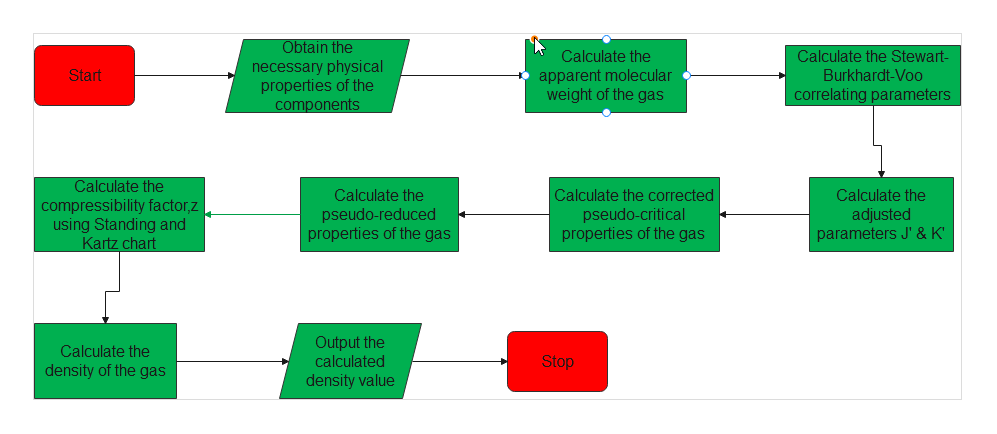

In [ ]:
import math
import numpy as np

# Defining variables for the parameters whose values are known
P = 2000 # Pressure of the gas in Pounds per square in absolute,psia(1psi = 1psia)
T = 609.67 # Temperature of gas in Rankin,R (R = F+459.67)
R = 10.732 # The universal gas constant in psia.ft3/lb.R
γC7plus = 0.81 # Specific gravity of the C7 plus fraction

# Data such as molecula weight,critical temperature and pressure were obtained from "Data Book" compiled by Curtis H.Whitson
C1,C2,C3,nC4,nC5,nC6,C7plus = 0.83,0.06,0.03,0.02,0.02,0.01,0.03 # Mole fractions of the components
T_C1,T_C2,T_C3,T_nC4,T_nC5,T_nC6 = 343.0,549.8,665.7,765.3,845.4,913.4 # Critical temperatures of the components excluding the C7plus
P_C1,P_C2,P_C3,P_nC4,P_nC5,P_nC6 = 667.8,707.8,616.3,550.7,488.6,436.9 # Critical pressures of the components excluding the C7plus
M_C1,M_C2,M_C3,M_nC4,M_nC5,M_nC6,M_C7plus = 16.04,30.07,44.09,58.12,72.15,86.17,161 # Molecualr weight of the components

# Calculating the apparent molecular weight of the gas mixture
MW = (C1*M_C1)+(C2*M_C2)+(C3*M_C3)+(nC4*M_nC4)+(nC5*M_nC5)+(nC6*M_nC6)+(C7plus*M_C7plus) # MW is the apparent molecular weight of the gas mixture

# CALCULATION OF CRITICAL PROPERTIES OF THE C7plus FRACTION FROM RIAZI AND DAUBERT EQUATION

# The critical temperature
a,b,c,d,e,f = 544.4,0.2998,1.0555,-1.3478*(10**-4),-0.61641,0.0 # Constants for the critical temperature
T_C7plus = a*(M_C7plus**b)*(γC7plus**c)*math.exp((d*M_C7plus)+(e*γC7plus)+(f*M_C7plus*γC7plus))

# The critical pressure
A,B,C,D,E,F = 4.5203*(10**4),-0.8063,1.6015,-1.8078*(10**-3),-0.30840,0.0 # Constants for the critical pressure
P_C7plus = A*(M_C7plus**B)*(γC7plus**C)*math.exp((D*M_C7plus)+(E*γC7plus)+(F*M_C7plus*γC7plus))

# COMPUTING THE PSEUDO-CRITICAL PROPERTIES

# Calculating the uncorrected values of the Stewart-Burkhardt-Voo correlating parameters,J&K and also the parameters Fj,Ej,Ek
t = np.array([T_C1,T_C2,T_C3,T_nC4,T_nC5,T_nC6,T_C7plus]) # Creating an array of the critical temperature values
p = np.array([P_C1,P_C2,P_C3,P_nC4,P_nC5,P_nC6,P_C7plus]) # Creating an array of the critical pressure values
yi = np.array([C1,C2,C3,nC4,nC5,nC6,C7plus]) # Creating an array of the mole fraction values

Σj1 = []
for (f, i, l) in zip(t,p,yi):
    x = l*(f/i)
    Σj1.append(x) 
Σja = sum(Σj1)

Σj2 = []
for (f, i, l) in zip(t,p,yi):
    x = l*(f/i)**0.5
    Σj2.append(x) 
Σjb = sum(Σj2)

J= 1/3*Σja + 2/3*(Σjb)**2 # Uncorrected Stewart-Burkhardt-Voo correlating parameter
 
k = []
for f,i,l in zip(t,p,yi):
    x = l*(f/(i**0.5))
    k.append(x)

K = sum(k) # Uncorrected Stewart-Burkhardt-Voo correlating parameter

Fj = 1/3*C7plus*(T_C7plus/P_C7plus)+(2/3*((C7plus*((T_C7plus/P_C7plus)**0.5))**2))

Ej = 0.6081*Fj+(1.1325*(Fj**2))-(14.004*Fj*C7plus)+(64.434*Fj*(C7plus**2))

Ek = (T_C7plus/(P_C7plus)**0.5)*(0.3129*C7plus-(4.8156*(C7plus**2))+(27.3751*(C7plus**3)))

# Correcting the J and K values
Jc = J-Ej # Corrected Stewart-Burkhardt-Voo correlating parameter
Kc = K-Ek # Corrected Stewart-Burkhardt-Voo correlating parameter

# CALCULATING THE PSEUDO-CRITICAL PROPERTIES

Tpc = (K**2)/J # Uncorrected pseudo-critical temperature
Ppc = Tpc/J # Uncorrected pseudo-critical pressure

Tpcc = (Kc**2)/Jc # Corrected pseudo-critical temperature
Ppcc = Tpcc/Jc # Corrected pseudo-critical pressure

# CALCULATING THE PSEUDO-REDUCED PROPERTIES

Tpr = T/Tpc # Pseudo-reduced temperature from the uncorrected pseudo-critical properties
Ppr = P/Ppc # Pseudo-reduced pressure from the uncorrected pseudo-critical properties

Tprc = T/Tpcc # Pseudo-reduced temperature from the corrected  pseudo-critical properties
Pprc = P/Ppcc # Pseudo-reduced pressure from the corrected  pseudo-critical properties

# The compressibility factor is calculated from the Standing and Kartz chart using the pseudo-reduced properties
# From the Standing and Kartz chart, the compressibility factor,z using the corrected pseudo-reduced properties is 0.76
# From the Standing and Kartz chart, the compressibility factor,z using the uncorrected pseudo-reduced properties is 0.71

# CALCULATING THE DENSITY

Zc= 0.74 # Compressibility factor from the corrected pseudo-reduced properties
Z = 0.71 # Compressibility factor from the uncorrected pseudo-reduced properties

# Calculating the density using the corrected compressibility factor,z
ρc = (P*MW)/(Zc*R*T)

# Calculating the density using the uncorrected compressibility factor,z
ρ = (P*MW)/(Z*R*T)

# Calculating the error
E = ((ρ-ρc)/ρ)*100


#### THE CORRECTED PSEUDO-REDUCED PROPERTIES
#### Tpr: 1.45 $^oR$
#### Ppr: 3.09 psia
#### THE UNCORRECTED PSEUDO-REDUCED PROPERTIES
#### Tpr: 1.41 $^oR$
#### Ppr: 3.06 psia
#### The compressibility factor,z from corrected properties is 0.74
#### The compressibility factor,z from uncorrected properties is 0.71
#### The density of the gas obtained by correcting the pseudo-critical properties is 10.22 $lb/ft^3$
#### The density of the gas obtained without correcting the pseudo-critical properties is 10.65 $lb/ft^3$
#### The percentage error is 4.05